In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_lend = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df_lend.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lend["loan_status"]

# Separate the X variable, the features
X = df_lend.drop("loan_status", axis=1)

In [4]:
# Review the y variable Series
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
5,10100.0,7.438,50600,0.407115,4,1,20600
6,10300.0,7.490,51100,0.412916,4,1,21100
7,8800.0,6.857,45100,0.334812,3,0,15100
8,9300.0,7.096,47400,0.367089,3,0,17400
9,9700.0,7.248,48800,0.385246,4,0,18800


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
y_pred = logistic_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [9]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[18655   110]
 [   36   583]]


In [10]:
# Print the classification report for the model
report_str = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report_str)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



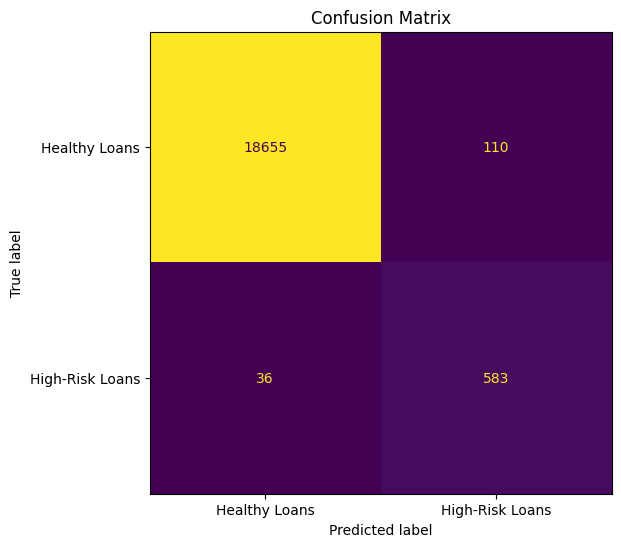

In [11]:
# Visualize the confusion matrix - option 1
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Healthy Loans", "High-Risk Loans"])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, colorbar=False)
plt.title("Confusion Matrix")
plt.show()

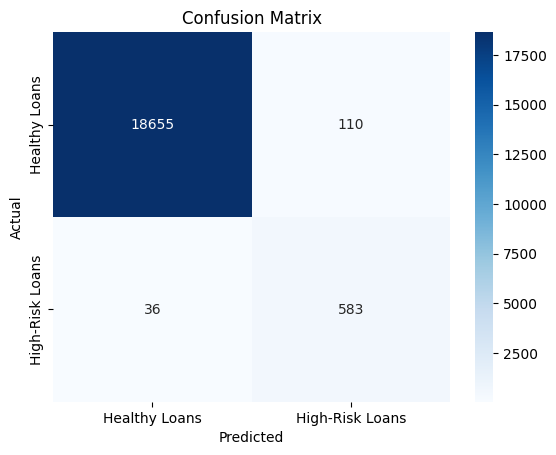

<Figure size 640x480 with 0 Axes>

In [14]:
# Visualize the confusion matrix - option 2
import seaborn as sns

# Display the confusion matrix as a heatmap using Seaborn library
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Healthy Loans", "High-Risk Loans"], yticklabels=["Healthy Loans", "High-Risk Loans"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the figure
plt.savefig("Resources/heatmap_figure.png")

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model is extrememly good at predicting healthy loans (f-score & precision = 1.00, recall = 0.99), but not quite as good at predicting high-risk loans (f-score = 0.89, precision = 0.84 & recall = 0.94). Using this model, some high risk loans may be approved. 

---